<a href="https://colab.research.google.com/github/fatjan/learn-tensorflow/blob/master/Celc_to_Fahr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

# Setup Training Data

In [3]:
celcius_q = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

for i, c in enumerate(celcius_q):
  print("{} degree Celcius = {} degrees Fahrenheit.".format(c, fahrenheit_a[i]))

-40.0 degree Celcius = -40.0 degrees Fahrenheit.
-10.0 degree Celcius = 14.0 degrees Fahrenheit.
0.0 degree Celcius = 32.0 degrees Fahrenheit.
8.0 degree Celcius = 46.0 degrees Fahrenheit.
15.0 degree Celcius = 59.0 degrees Fahrenheit.
22.0 degree Celcius = 72.0 degrees Fahrenheit.
38.0 degree Celcius = 100.0 degrees Fahrenheit.


In [6]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

In [8]:
model = tf.keras.Sequential([l0])

In [9]:
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))

In [10]:
history = model.fit(celcius_q, fahrenheit_a, epochs=500, verbose=False)

print("Finished training the model")

Finished training the model


Display Training Statistics

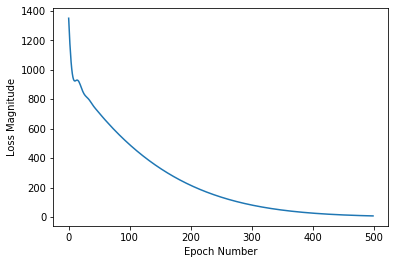

In [11]:
import matplotlib.pyplot as plt
plt.xlabel("Epoch Number")
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

Predict Values using the model

In [12]:
print(model.predict([100.0]))

[[211.3379]]


Internal variables of dense layer

In [13]:
print("These are the layer variables: {}".format(l0.get_weights()))

These are the layer variables: [array([[1.8204855]], dtype=float32), array([29.289347], dtype=float32)]


A little experiment

In [16]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(celcius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")
print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict([100.0])))
print("These are the l0 variables: {}".format(l0.get_weights()))
print("These are the l1 variables: {}".format(l1.get_weights()))
print("These are the l2 variables: {}".format(l2.get_weights()))




Finished training the model
Model predicts that 100 degrees Celsius is: [[211.74745]] degrees Fahrenheit
These are the l0 variables: [array([[ 0.27637994, -0.25054616, -0.04979979, -0.64210886]],
      dtype=float32), array([ 0.03233606, -2.7714784 ,  3.603819  , -4.02712   ], dtype=float32)]
These are the l1 variables: [array([[ 0.2145275 , -0.42137393, -0.43905655,  0.76731926],
       [ 1.2044214 , -0.49358517,  0.3312288 ,  0.78283197],
       [ 0.01898255, -0.9962792 , -1.58766   ,  0.2628643 ],
       [ 1.2503554 , -0.3877957 ,  0.66347754,  0.9681266 ]],
      dtype=float32), array([-3.7507217, -1.3225648, -3.2828615, -2.3863306], dtype=float32)]
These are the l2 variables: [array([[-1.1285491 ],
       [-0.30750155],
       [-0.9571876 ],
       [-0.29657474]], dtype=float32), array([3.452944], dtype=float32)]
